In [250]:
from random import randint
from typing import Optional
import seaborn as sns
import pandas as pd
import numpy as np

In [251]:
n_games = 1_000_000

In [252]:
def game(game_length:Optional[int]=None):
    # 1 = Heads
    # 2 = Tails
    n_rounds=0
    if game_length is None:
        outcome = randint(1,2)
        while outcome != 1:
            n_rounds += 1
            outcome = randint(1,2)
    
    else:
        for _ in range(game_length):
            outcome = randint(1,2)
            if outcome == 1:
                break
            n_rounds += 1
            outcome = randint(1,2)
            
    
    return n_rounds

In [253]:
def multiple_games(n_games:int,max_rounds:Optional[int]=None):
    rounds_played = []
    for _ in range(n_games):
        rounds_played.append(game(max_rounds))
    return rounds_played

In [254]:
max_rounds = 20
n_games = 1_000_000
results = multiple_games(n_games,max_rounds)

In [267]:
results_data = pd.DataFrame(results,columns=["results"])
results_data = results_data.reset_index()
results_data = results_data.assign(winnings = lambda x: 2**(x.results+1),
                                   total_winnings = lambda x: x.cumsum().winnings,
                                   total_paid = lambda x: max_rounds * (x.index + 1), 
                                   ev_adjusted_total = lambda x: x.total_winnings - x.total_paid,
                                   ev_adjusted_pnl = lambda x: -1 * x.ev_adjusted_total,
                                   made_money = lambda x: x.winnings > max_rounds)
results_data.head()

,index,results,winnings,total_winnings,total_paid,ev_adjusted_total,ev_adjusted_pnl,made_money
0,0,3,16,16,20,-4,4,False
1,1,0,2,18,40,-22,22,False
2,2,2,8,26,60,-34,34,False
3,3,0,2,28,80,-52,52,False
4,4,0,2,30,100,-70,70,False


In [268]:
games_made_money = results_data.made_money.sum()
games_lost_money = n_games - games_made_money

In [269]:
print(games_made_money)
print(games_lost_money)
print(games_made_money/n_games)

62613
937387
0.062613


<Axes: xlabel='results', ylabel='Count'>

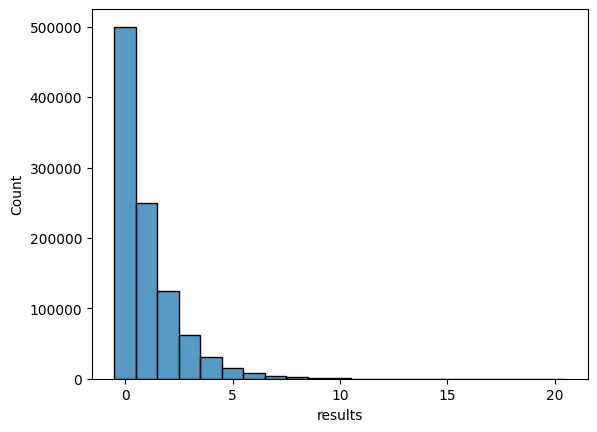

In [256]:
sns.histplot(results_data,discrete=True,x='results')

<Axes: xlabel='index', ylabel='winnings'>

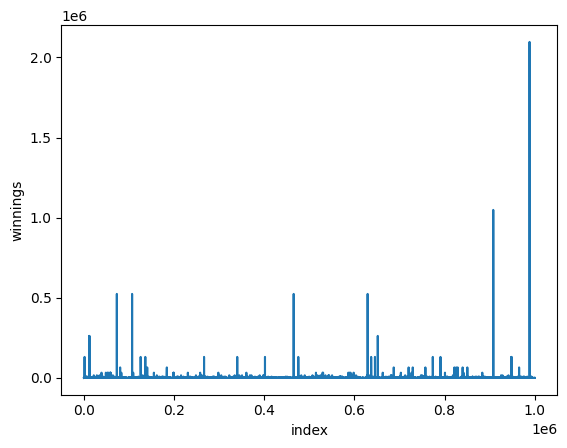

In [257]:
sns.lineplot(results_data, y='winnings', x='index')

<Axes: xlabel='index', ylabel='total_winnings'>

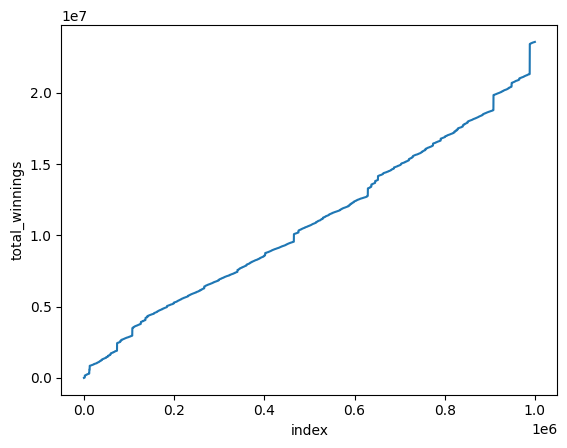

In [258]:
sns.lineplot(results_data,y='total_winnings',x='index')

<Axes: xlabel='index', ylabel='ev_adjusted_total'>

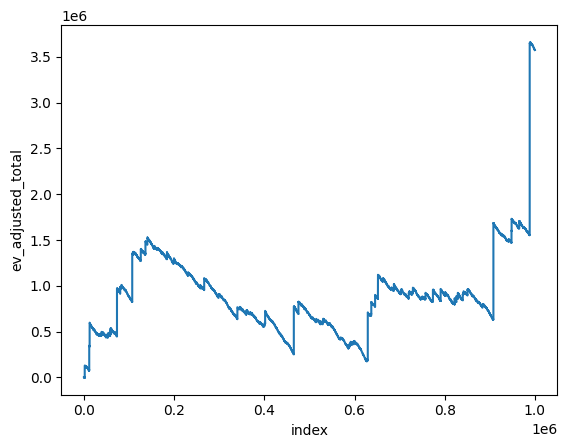

In [259]:
sns.lineplot(results_data,y='ev_adjusted_total',x='index')

<Axes: xlabel='index', ylabel='ev_adjusted_pnl'>

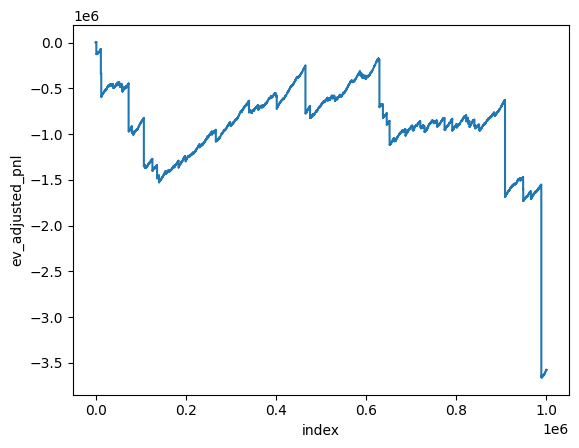

In [260]:
sns.lineplot(results_data,y='ev_adjusted_pnl',x='index')

In [261]:
total_paid = max_rounds * n_games
total_earned = results_data.winnings.sum()

In [262]:
print(total_paid)
print(total_earned)

20000000
23575366
